In [1]:
import zipfile
from sklearn.model_selection import train_test_split
import os
import shutil

## Machine learning

In [2]:
with zipfile.ZipFile('trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
extracted_directory = "./trafficsigns_dataset"
train_directory = "./train_data"
val_directory = "./val_data"
test_directory = "./test_data"

# Create train, validation, and test directories if they don't exist
for directory in [train_directory, val_directory, test_directory]:
    os.makedirs(directory, exist_ok=True)

# Function to split data into train, validation, and test
def split_data(source, train, val, test, split_ratio):
    for shape_folder in os.listdir(source):
        if shape_folder in ['.DS_Store', 'Readme.txt']:
            continue  # Ignore non-image files
        shape_source = os.path.join(source, shape_folder)
        shape_train = os.path.join(train, shape_folder)
        shape_val = os.path.join(val, shape_folder)
        shape_test = os.path.join(test, shape_folder)
        
        for folder in [shape_train, shape_val, shape_test]:
            os.makedirs(folder, exist_ok=True)
        
        for type_folder in os.listdir(shape_source):
            if type_folder in ['.DS_Store', 'Readme.txt']:
                continue  # Ignore non-image files
            type_source = os.path.join(shape_source, type_folder)
            type_train = os.path.join(shape_train, type_folder)
            type_val = os.path.join(shape_val, type_folder)
            type_test = os.path.join(shape_test, type_folder)
            
            for folder in [type_train, type_val, type_test]:
                os.makedirs(folder, exist_ok=True)
            
            files = os.listdir(type_source)
            train_files, test_files = train_test_split(files, test_size=split_ratio[2], random_state=42)
            train_files, val_files = train_test_split(train_files, test_size=split_ratio[1]/(split_ratio[0]+split_ratio[1]), random_state=42)
            
            # Copy files to train, validation, and test directories
            for file in train_files:
                shutil.copy(os.path.join(type_source, file), os.path.join(type_train, file))
            
            for file in val_files:
                shutil.copy(os.path.join(type_source, file), os.path.join(type_val, file))
                
            for file in test_files:
                shutil.copy(os.path.join(type_source, file), os.path.join(type_test, file))

# Split data into train, validation, and test with 60-20-20 split ratio
split_ratio = [0.6, 0.2, 0.2]
split_data(extracted_directory, train_directory, val_directory, test_directory, split_ratio)

print("Data split completed successfully.")


Data split completed successfully.


In [4]:
def get_data_shape(directory):
    num_samples = 0
    for root, dirs, files in os.walk(directory):
        num_samples += len(files)
    return num_samples

# Get the shape of training, validation, and testing sets
train_shape = get_data_shape(train_directory)
val_shape = get_data_shape(val_directory)
test_shape = get_data_shape(test_directory)

# Get total number of images
total_images = train_shape + val_shape + test_shape

print("Training Set Shape:", train_shape)
print("Validation Set Shape:", val_shape)
print("Testing Set Shape:", test_shape)
print("Total Number of Images:", total_images)


Training Set Shape: 2212
Validation Set Shape: 742
Testing Set Shape: 746
Total Number of Images: 3700


Training Set Samples:


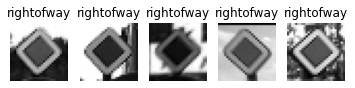

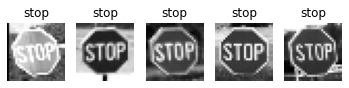

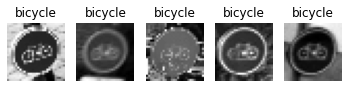

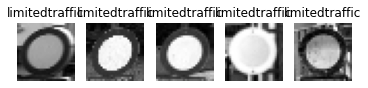

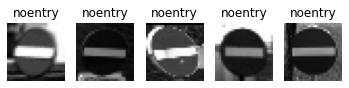

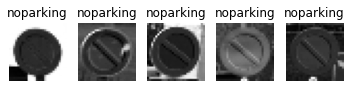

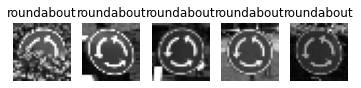

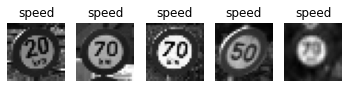

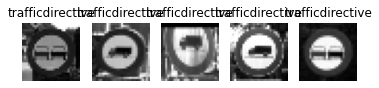

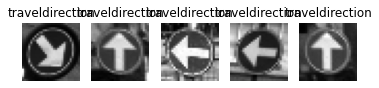

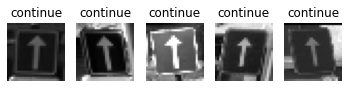

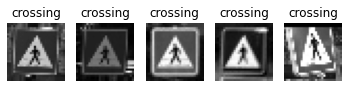

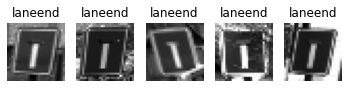

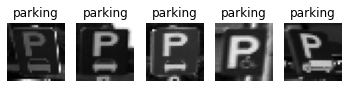

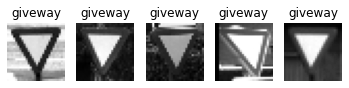

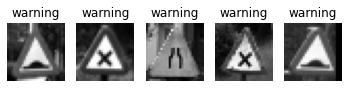

Validation Set Samples:


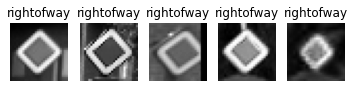

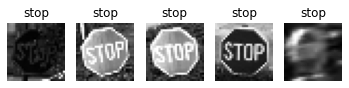

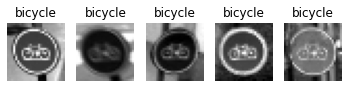

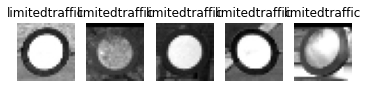

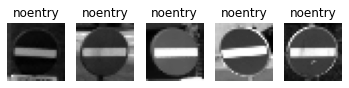

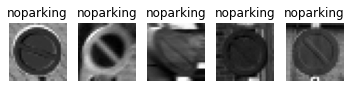

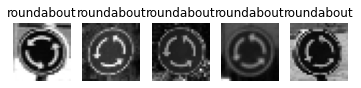

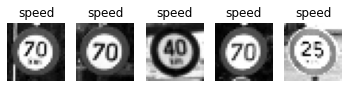

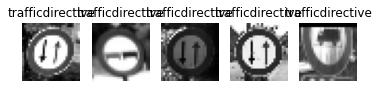

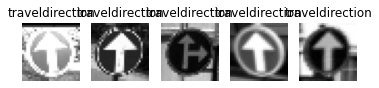

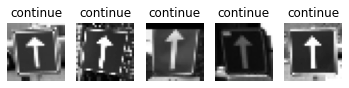

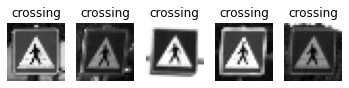

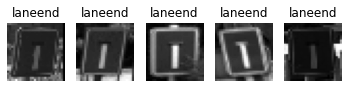

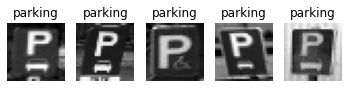

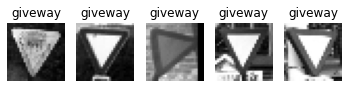

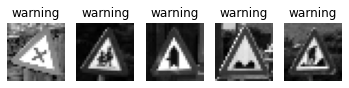

Testing Set Samples:


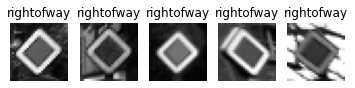

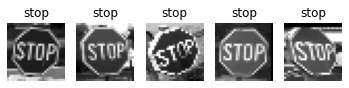

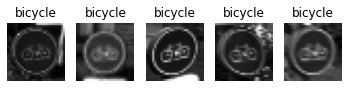

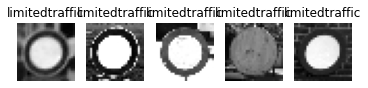

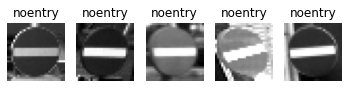

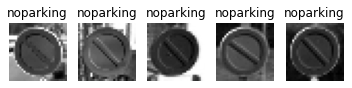

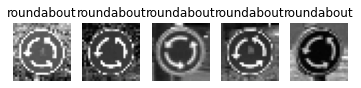

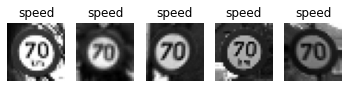

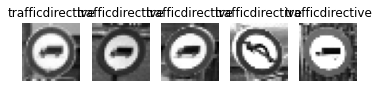

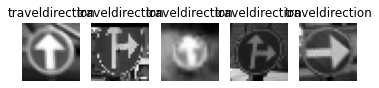

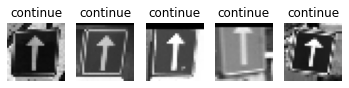

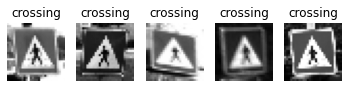

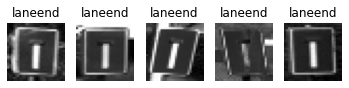

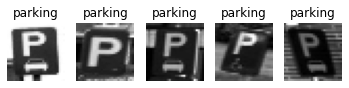

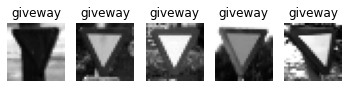

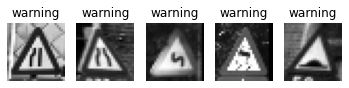

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_samples(directory, num_samples=5):
    for shape_folder in os.listdir(directory):
        shape_directory = os.path.join(directory, shape_folder)
        if os.path.isdir(shape_directory):  # Check if it's a directory
            for type_folder in os.listdir(shape_directory):
                type_directory = os.path.join(shape_directory, type_folder)
                if os.path.isdir(type_directory):  # Check if it's a directory
                    files = os.listdir(type_directory)
                    files = [f for f in files if not f.startswith('.')]  # Filter out hidden files
                    if len(files) < num_samples:
                        num_samples = len(files)  # Adjust num_samples if fewer files available
                    random_files = random.sample(files, num_samples)  # Randomly select num_samples files
                    for i, file in enumerate(random_files):  # Enumerate over the randomly selected files
                        file_path = os.path.join(type_directory, file)
                        img = mpimg.imread(file_path)
                        plt.subplot(1, num_samples, i+1)
                        plt.imshow(img, cmap='gray')  # Specify 'gray' colormap for grayscale display
                        plt.axis('off')
                        plt.title(os.path.basename(type_directory))
                    plt.show()  # Show the plot after the loop

# Display random samples from training, validation, and testing sets
print("Training Set Samples:")
display_random_samples(train_directory)
print("Validation Set Samples:")
display_random_samples(val_directory)
print("Testing Set Samples:")
display_random_samples(test_directory)


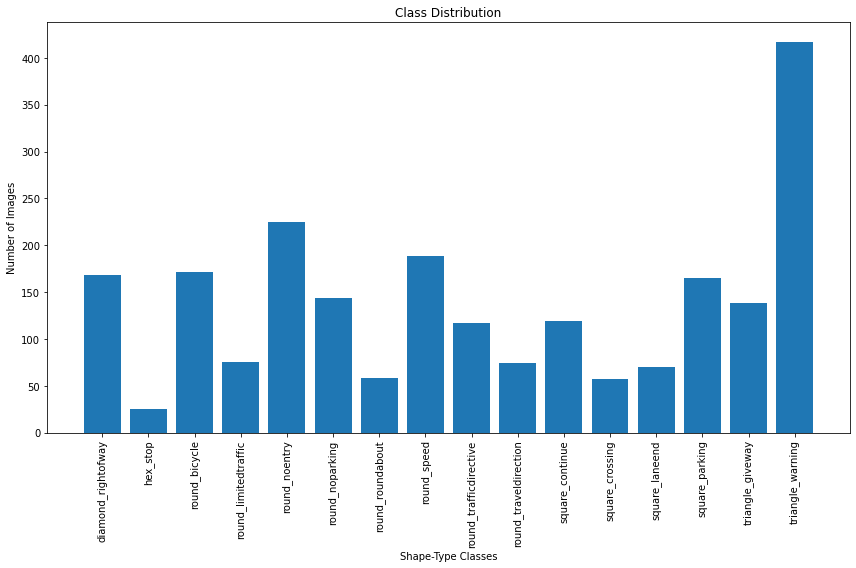

Total number of classes: 16


In [6]:
import os

# Define paths to train data
train_directory = "./train_data"

# Get list of shape classes (shape types)
shape_classes = os.listdir(train_directory)

# Dictionary to store counts of images per shape and type combination
class_counts = {}

# Iterate over shape classes (shape types)
for shape_class in shape_classes:
    shape_class_dir = os.path.join(train_directory, shape_class)
    # Get list of type classes for each shape class
    type_classes = os.listdir(shape_class_dir)
    # Iterate over type classes
    for type_class in type_classes:
        type_class_dir = os.path.join(shape_class_dir, type_class)
        # Count the number of images in each shape and type combination class directory
        class_name = f"{shape_class}_{type_class}"  # Combine shape and type class names
        class_counts[class_name] = sum(len(files) for _, _, files in os.walk(type_class_dir))

# Plot class distribution
plt.figure(figsize=(12, 8))
plt.bar(range(len(class_counts)), list(class_counts.values()), align='center')
plt.xticks(range(len(class_counts)), list(class_counts.keys()), rotation=90)
plt.xlabel('Shape-Type Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.tight_layout()
plt.show()

print("Total number of classes:", len(class_counts))


In [7]:
# Print count of each class
print("Class distribution")
for class_name, count in class_counts.items():
    print(class_name,":", count)

Class distribution
diamond_rightofway : 168
hex_stop : 25
round_bicycle : 171
round_limitedtraffic : 75
round_noentry : 225
round_noparking : 144
round_roundabout : 58
round_speed : 189
round_trafficdirective : 117
round_traveldirection : 74
square_continue : 119
square_crossing : 57
square_laneend : 70
square_parking : 165
triangle_giveway : 138


In [8]:
#TO DELETE DIRECTORIES

# import shutil

# # Define paths
# train_directory = "./train_data"
# val_directory = "./val_data"
# test_directory = "./test_data"

# # Function to delete directories
# def delete_directories(*directories):
#     for directory in directories:
#         shutil.rmtree(directory, ignore_errors=True)

# # Delete train, val, and test directories
# delete_directories(train_directory, val_directory, test_directory)

# print("Directories deleted successfully.")


In [9]:
# model construction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Assuming class_counts is already defined as the number of classes
num_classes = len(class_counts)
model = build_model(num_classes)
model.summary()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators with augmentation for training and only rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
import tensorflow as tf
import os

def get_image_paths_and_labels(base_directory):
    image_paths = []
    labels = []
    label_dict = {}

    # Assign a numeric label to each type within each shape
    current_label = 0
    for shape in os.listdir(base_directory):
        shape_path = os.path.join(base_directory, shape)
        if os.path.isdir(shape_path):
            for sign_type in os.listdir(shape_path):
                type_path = os.path.join(shape_path, sign_type)
                if os.path.isdir(type_path):
                    if sign_type not in label_dict:
                        label_dict[sign_type] = current_label
                        current_label += 1
                    for image_name in os.listdir(type_path):
                        image_path = os.path.join(type_path, image_name)
                        image_paths.append(image_path)
                        labels.append(label_dict[sign_type])
    return image_paths, labels, label_dict

def decode_img(img):
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # Resize the image to the desired size
    return tf.image.resize(img, [28, 28])

def process_path(file_path, label):
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

# Base directory
base_directory = "./trafficsigns_dataset"

# Get image paths and labels
image_paths, labels, label_dict = get_image_paths_and_labels(base_directory)

# Create Dataset
path_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
image_label_ds = path_ds.map(process_path)

# Batch and shuffle
batch_size = 32
image_label_ds = image_label_ds.shuffle(buffer_size=1000).batch(batch_size)

# Now you can use image_label_ds in your model training

In [ ]:
import os

def get_classes(directory):
    """
    This function navigates through the directory structure and retrieves unique shape and type classes.
    Assumes the following structure:
    directory/
        shape1/
            type1/
            type2/
        shape2/
            type1/
            type2/
    """
    shape_classes = []
    type_classes = set()  # Use a set to avoid duplicates

    # Iterate through each item in the root directory
    for shape in os.listdir(directory):
        shape_path = os.path.join(directory, shape)
        if os.path.isdir(shape_path):
            shape_classes.append(shape)
            # Now explore each shape directory for types
            for type_ in os.listdir(shape_path):
                type_path = os.path.join(shape_path, type_)
                if os.path.isdir(type_path):
                    type_classes.add(type_)  # Add type to the set

    return shape_classes, list(type_classes)  # Convert type_classes set to list

# Directory where extracted data is stored
extracted_directory = "./trafficsigns_dataset"

# Get shape and type classes
shape_classes, type_classes = get_classes(extracted_directory)

print("Shape Classes Found:",shape_classes)
print("Type Classes Found:",type_classes)

In [ ]:
import os

def print_directory_structure(startpath):
    for root, dirs, files in os.walk(startpath, topdown=True):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        if files:
            print(subindent + f'{len(files)} files')

# Adjust the path to match where your data is stored
print_directory_structure('./trafficsigns_dataset')

In [14]:
# Data generator setup for shape classification
train_shape_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='sparse',
    classes=shape_classes  # Ensure that only shape directories are targeted
)

val_shape_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='sparse',
    classes=shape_classes
)

# Assuming that type_classes is a list of all traffic sign types
train_type_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='sparse',
    classes=type_classes  # Ensure that only type directories are targeted
)

val_type_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(28, 28),
    batch_size=32,
    color_mode='grayscale',
    class_mode='sparse',
    classes=type_classes
)

Found 2211 images belonging to 5 classes.
Found 742 images belonging to 5 classes.
Found 0 images belonging to 16 classes.
Found 0 images belonging to 16 classes.


In [15]:
# Assuming shape_classes and type_classes have been defined as shown in the previous example
num_shape_classes = len(shape_classes)
num_type_classes = len(type_classes)

# Build models for each classification task
shape_model = build_model(num_shape_classes)
type_model = build_model(num_type_classes)

# Train shape model
shape_history = shape_model.fit(
    train_shape_generator,
    validation_data=val_shape_generator,
    epochs=10,
    steps_per_epoch=train_shape_generator.samples // train_shape_generator.batch_size,
    validation_steps=val_shape_generator.samples // val_shape_generator.batch_size
)

# Train type model
type_history = type_model.fit(
    train_type_generator,
    validation_data=val_type_generator,
    epochs=10,
    steps_per_epoch=train_type_generator.samples // train_type_generator.batch_size,
    validation_steps=val_type_generator.samples // val_type_generator.batch_size
)

Epoch 1/10
69/69 [==============================] - 28s 404ms/step - loss: 1.3269 - accuracy: 0.4479 - val_loss: 1.2321 - val_accuracy: 0.5014
Epoch 2/10
69/69 [==============================] - 5s 68ms/step - loss: 1.2431 - accuracy: 0.4970 - val_loss: 1.0836 - val_accuracy: 0.5611
Epoch 3/10
69/69 [==============================] - 5s 78ms/step - loss: 1.1026 - accuracy: 0.5778 - val_loss: 0.8378 - val_accuracy: 0.7011
Epoch 4/10
69/69 [==============================] - 3s 49ms/step - loss: 0.9290 - accuracy: 0.6572 - val_loss: 0.6267 - val_accuracy: 0.7758
Epoch 5/10
69/69 [==============================] - 4s 65ms/step - loss: 0.7830 - accuracy: 0.7123 - val_loss: 0.4505 - val_accuracy: 0.8356
Epoch 6/10
69/69 [==============================] - 6s 91ms/step - loss: 0.7120 - accuracy: 0.7536 - val_loss: 0.3899 - val_accuracy: 0.8682
Epoch 7/10
69/69 [==============================] - 6s 91ms/step - loss: 0.5607 - accuracy: 0.8031 - val_loss: 0.2960 - val_accuracy: 0.8709
Epoch 8/10


ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# Evaluate both models on their respective test sets
shape_test_accuracy = shape_model.evaluate(test_shape_generator)
type_test_accuracy = type_model.evaluate(test_type_generator)

print(f"Shape Classification Test Accuracy: {shape_test_accuracy[1]*100:.2f}%")
print(f"Type Classification Test Accuracy: {type_test_accuracy[1]*100:.2f}%")

In [ ]:
# Function to plot training history
def plot_training_history(history, title="Training and Validation Accuracy"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title(title)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Plotting the training and validation history for both models
plot_training_history(shape_history, "Shape Classification Accuracy")
plot_training_history(type_history, "Type Classification Accuracy")